<a href="https://colab.research.google.com/github/lima-breno/time_series/blob/main/TS_09_Nao_Estacionarias_ARIMApassageirosAIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Séries temporais não estacionárias: ARIMA

Este notebook busca uma série temporal de um arquivo escolhido e faz algumas análises preliminares, bem como a aplicação dos modelos ARIMA.

Data da última atualização: 24/02/2025

#### Preliminares

In [ ]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [ ]:
# Leitura do arquivo de dados

MinhaSerieTemporal = pd.read_csv('Passageiros.csv', index_col = 0)

In [ ]:
# Exibição do DataFrame

MinhaSerieTemporal

,Passageiros (milhares)
Mês,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# Ajuste do índice para formato DateTime

MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

<Axes: xlabel='Mês'>

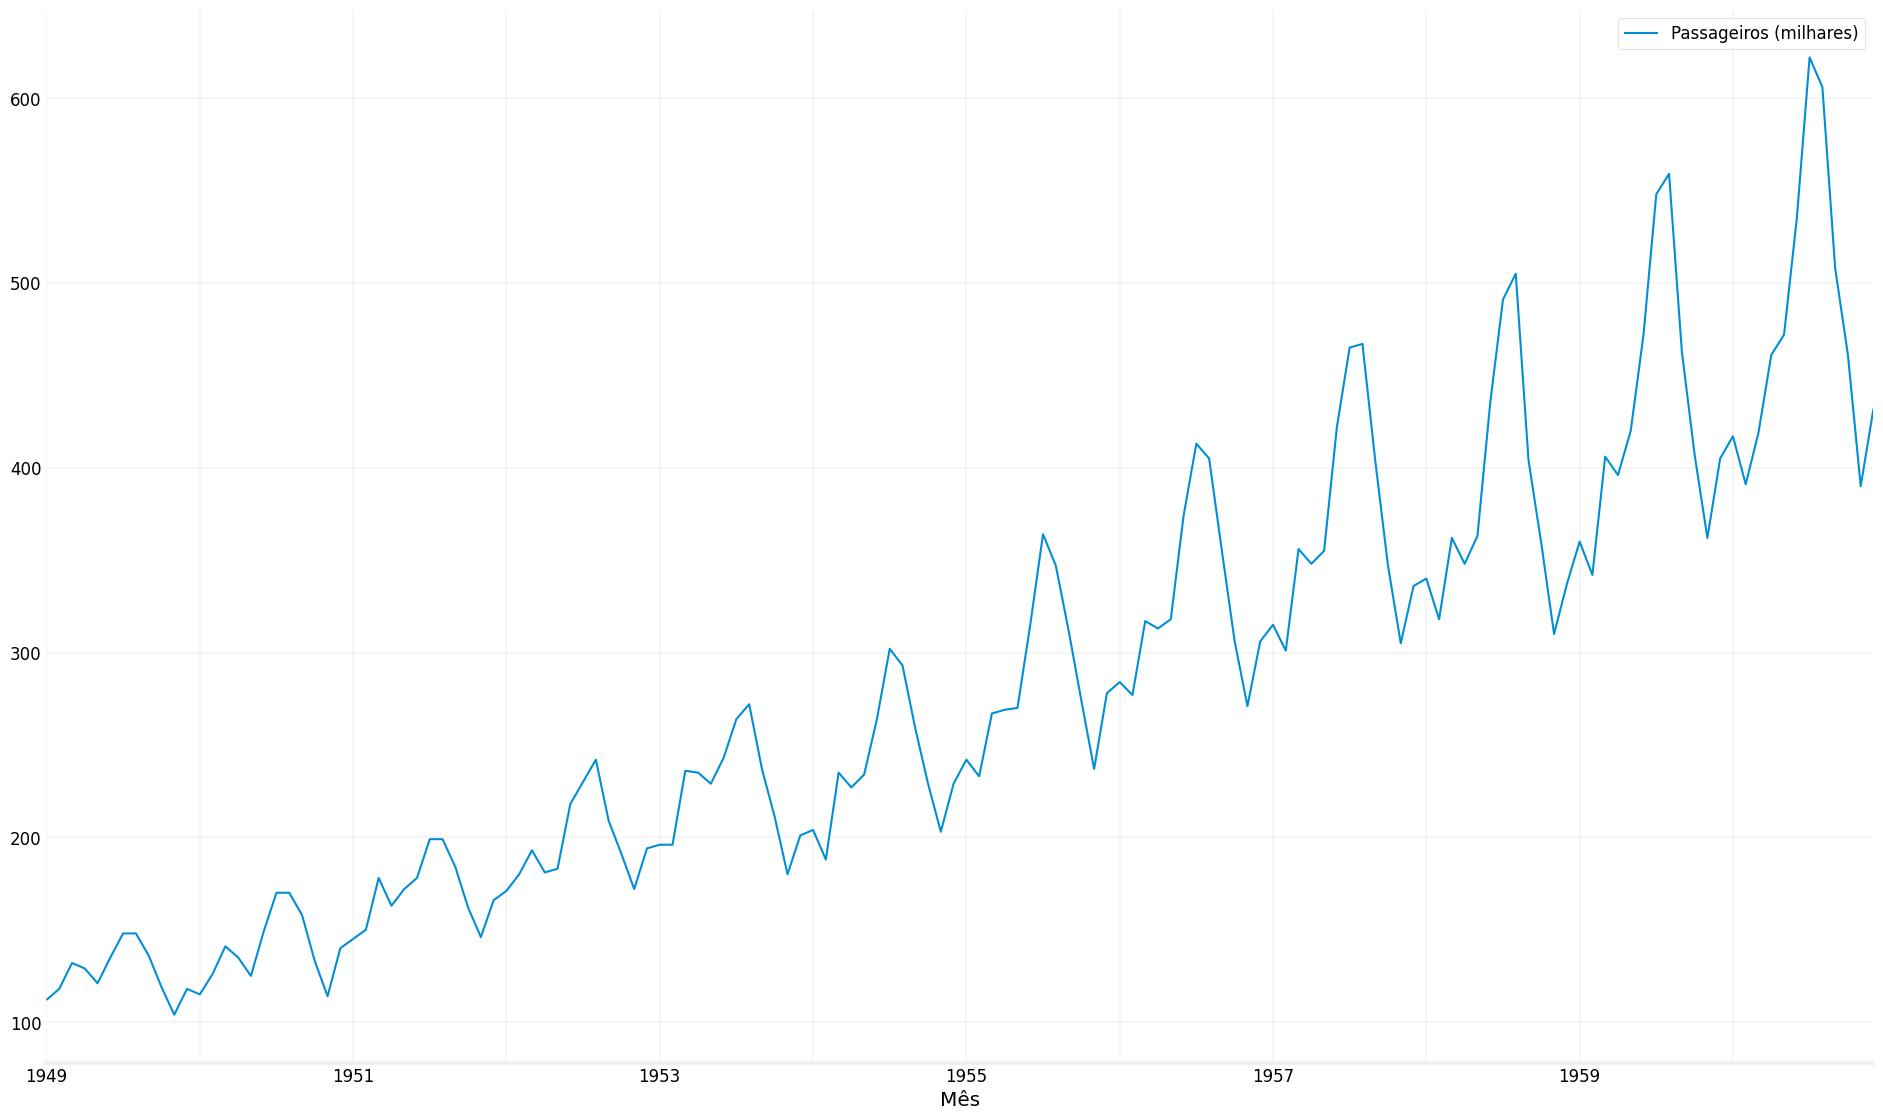

In [ ]:
# Gráfico
MinhaSerieTemporal.plot()

#### Decomposição da Série

In [ ]:
# Decomposição aditiva da série temporal

PeriodoSazonal = 12     # Sazonalidade anual

Decomposicao = seasonal_decompose(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], model = "add", period = PeriodoSazonal)

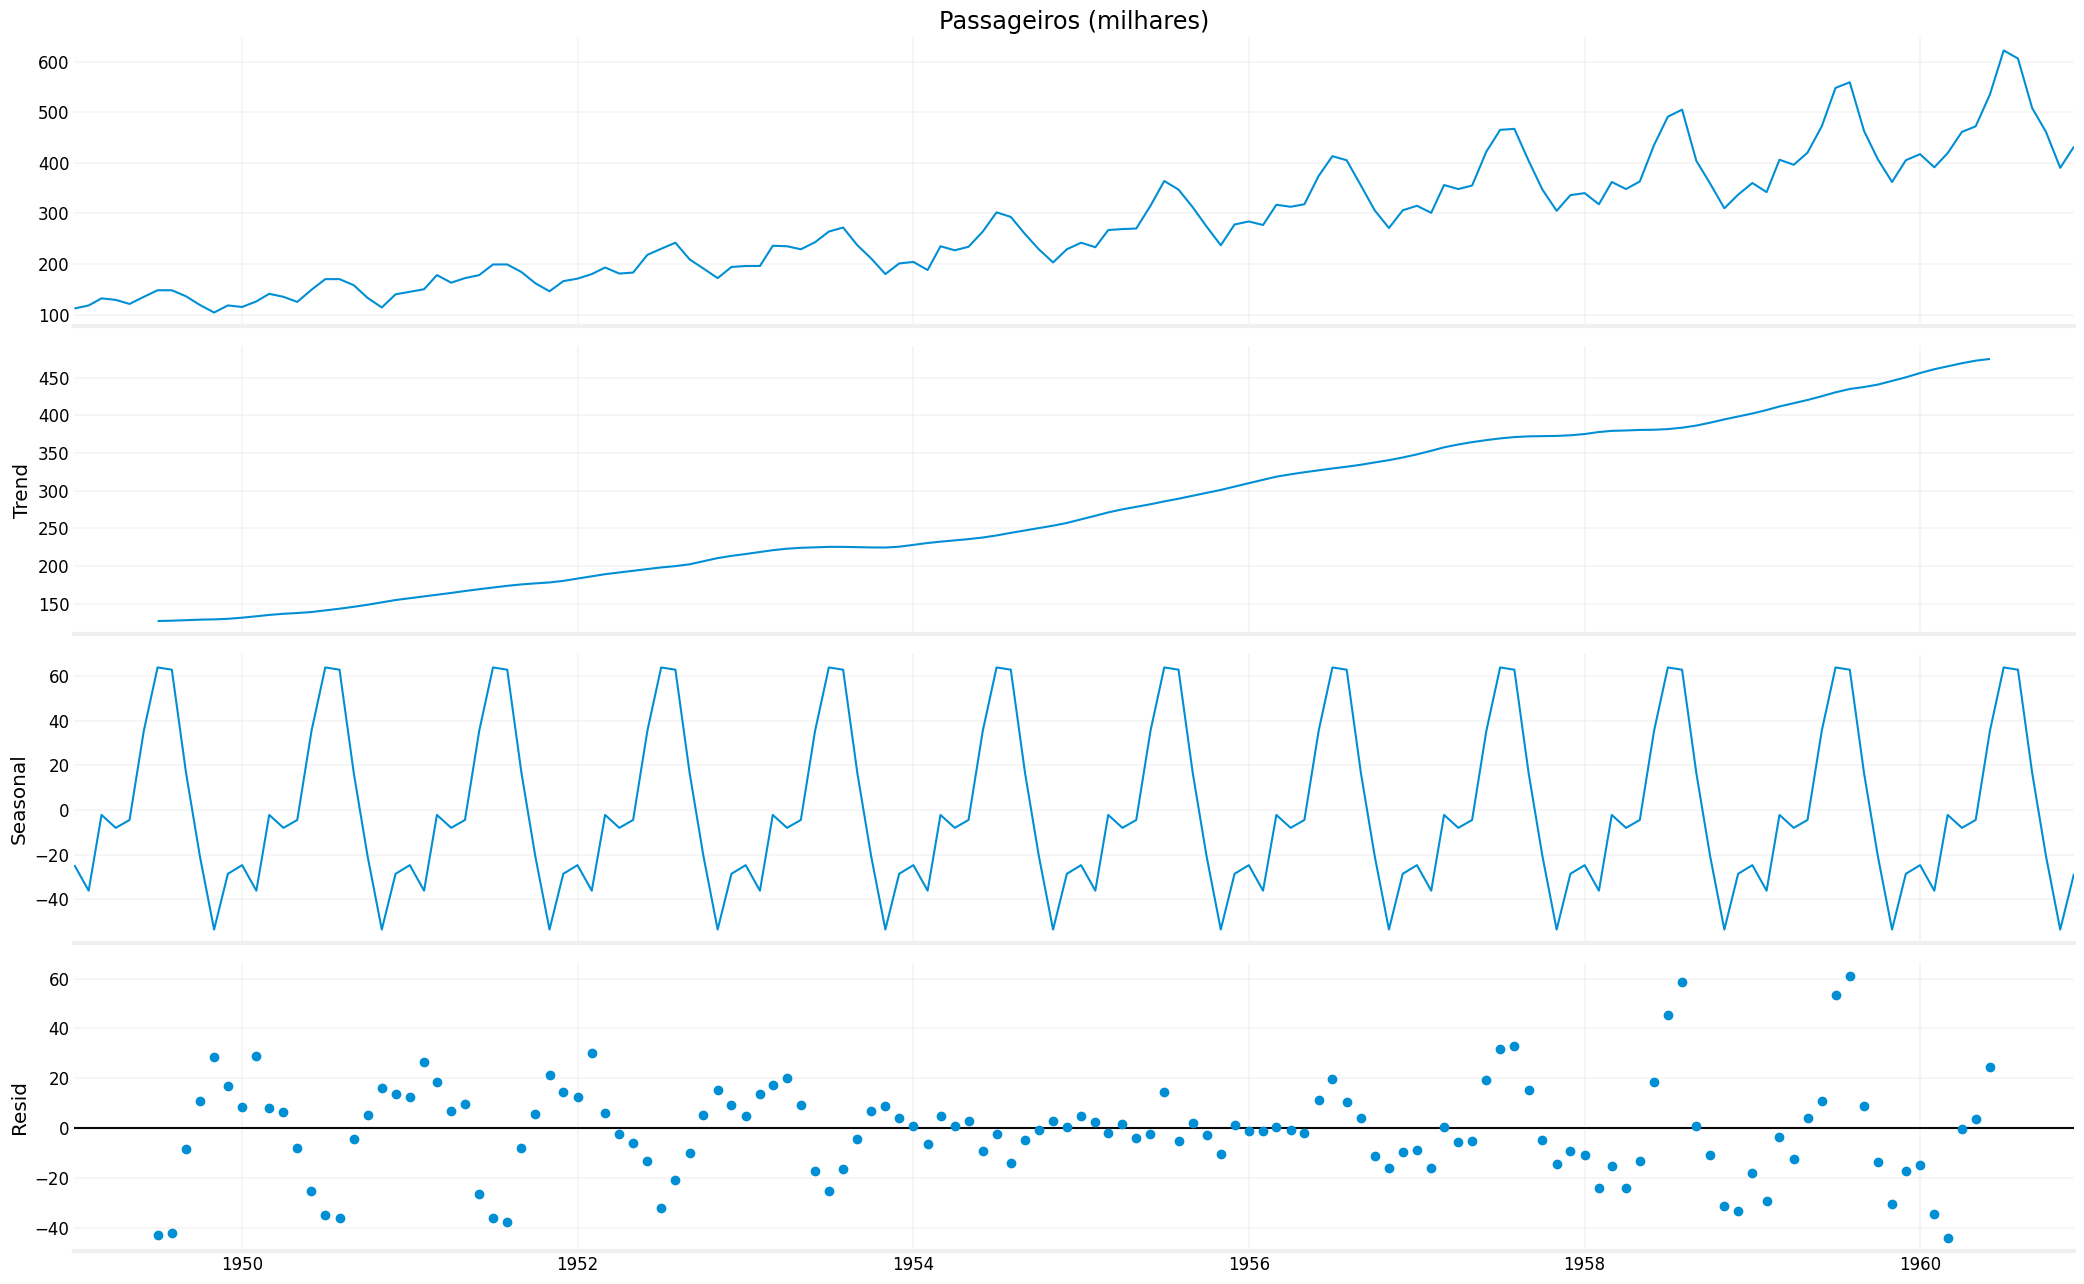

In [ ]:
Decomposicao.plot();

#### Teste ADF

In [ ]:
# Teste ADF para estacionariedade

ad_fuller_result = adfuller(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]])

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: 0.8154
p-value:          99.1880 %


In [ ]:
# Teste ADF para estacionariedade para a série das diferenças finitas de ordem escolhida

OrdemDif = 2

ad_fuller_result = adfuller(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif))

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: -16.3842
p-value:          0.0000 %


#### Funcão de autocorrelação

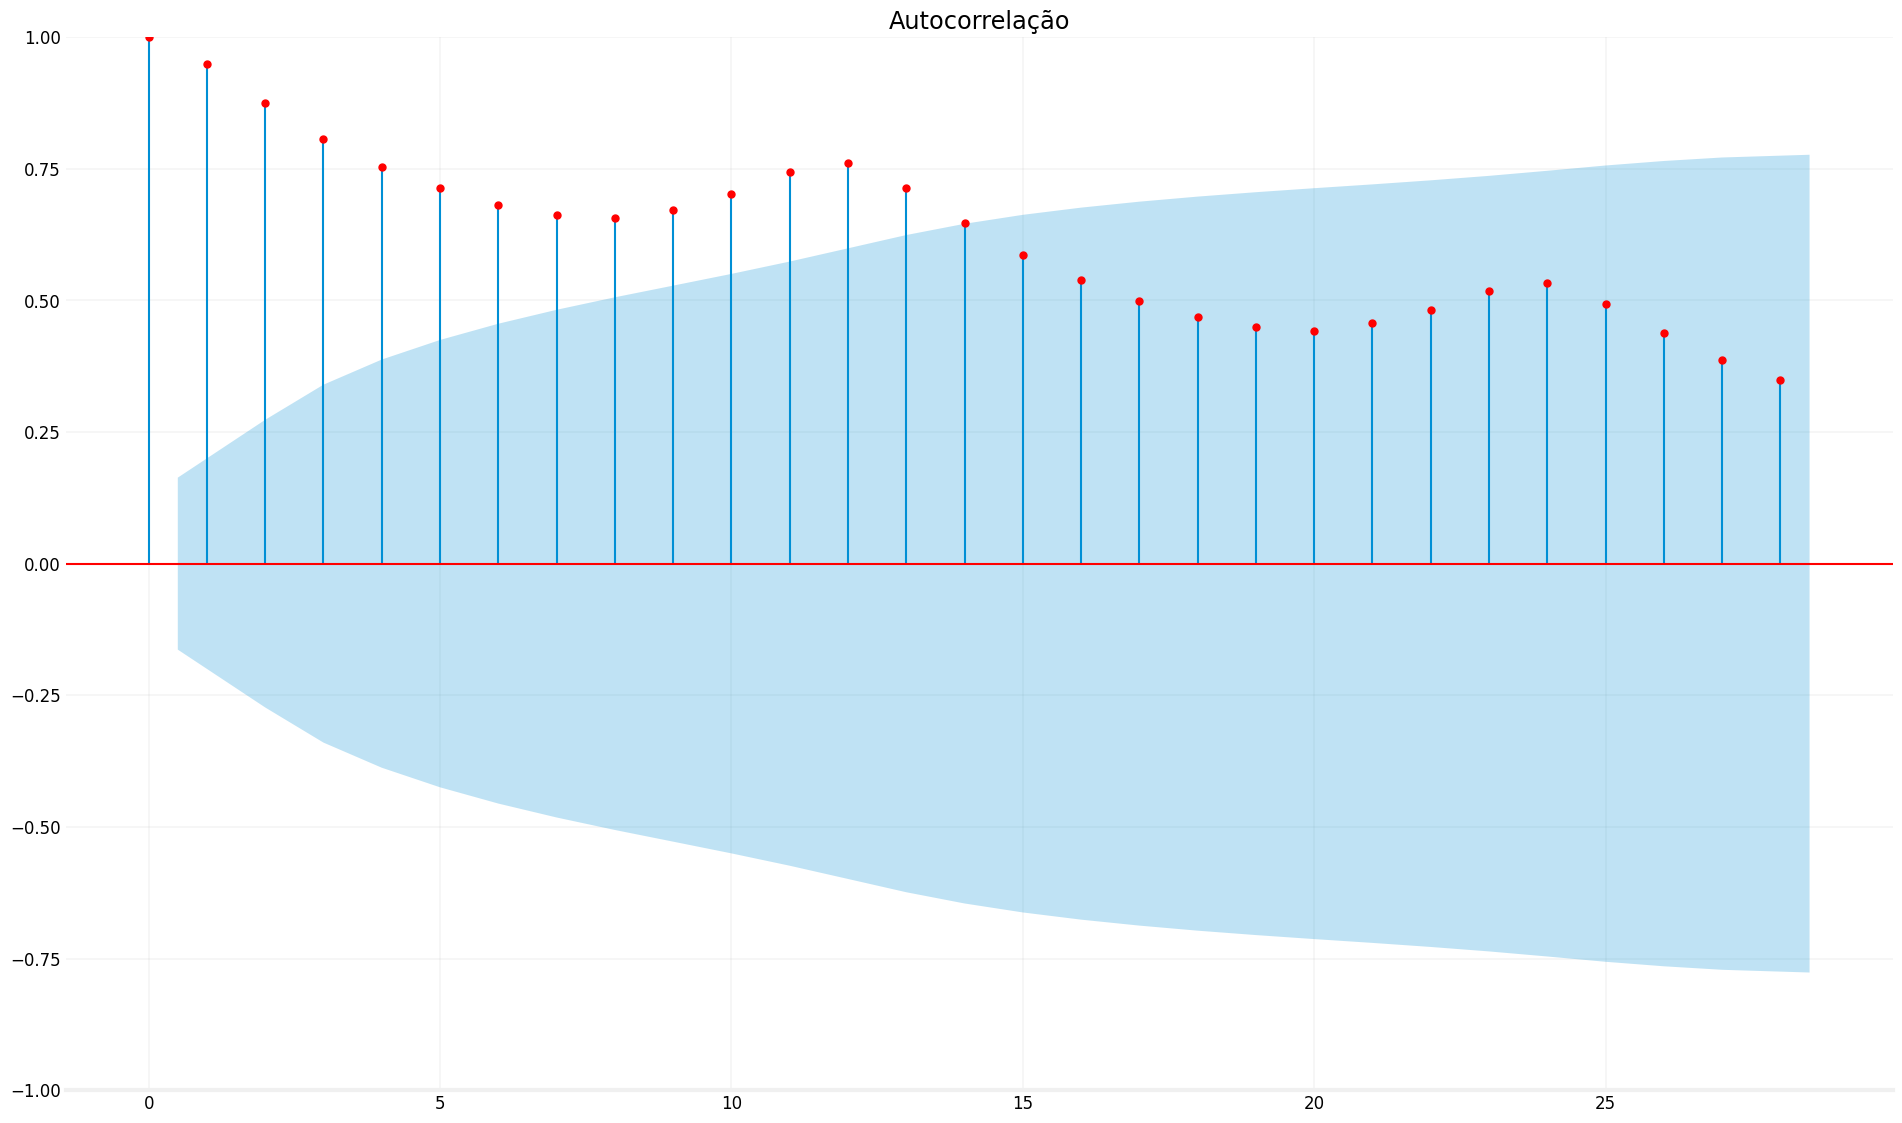

In [ ]:
# Função de correlação para série temporal

plot_acf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=28, title = "Autocorrelação", color="red");

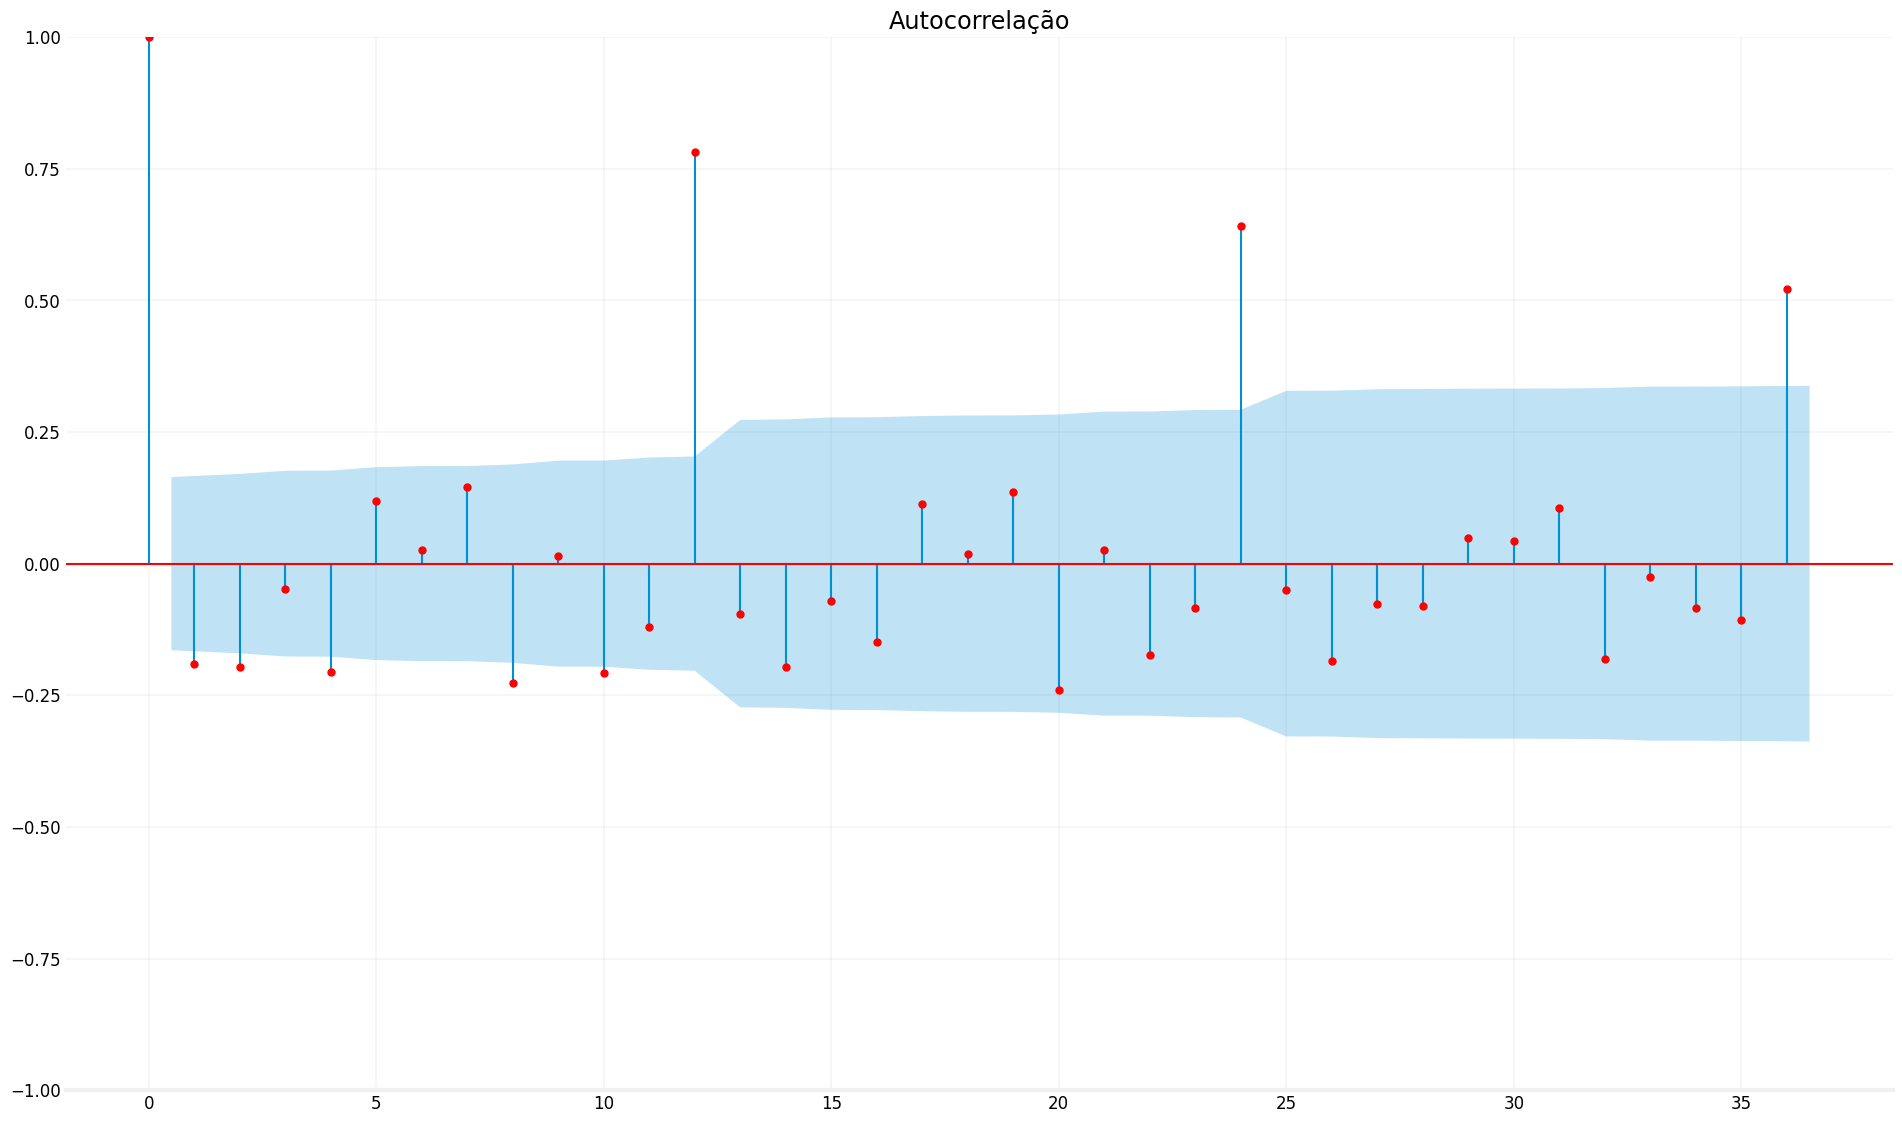

In [ ]:
# Função de correlação para série das diferenças finitas da ordem escolhida acima

plot_acf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=36, title = "Autocorrelação", color="red");

#### Funcão de autocorrelação parcial

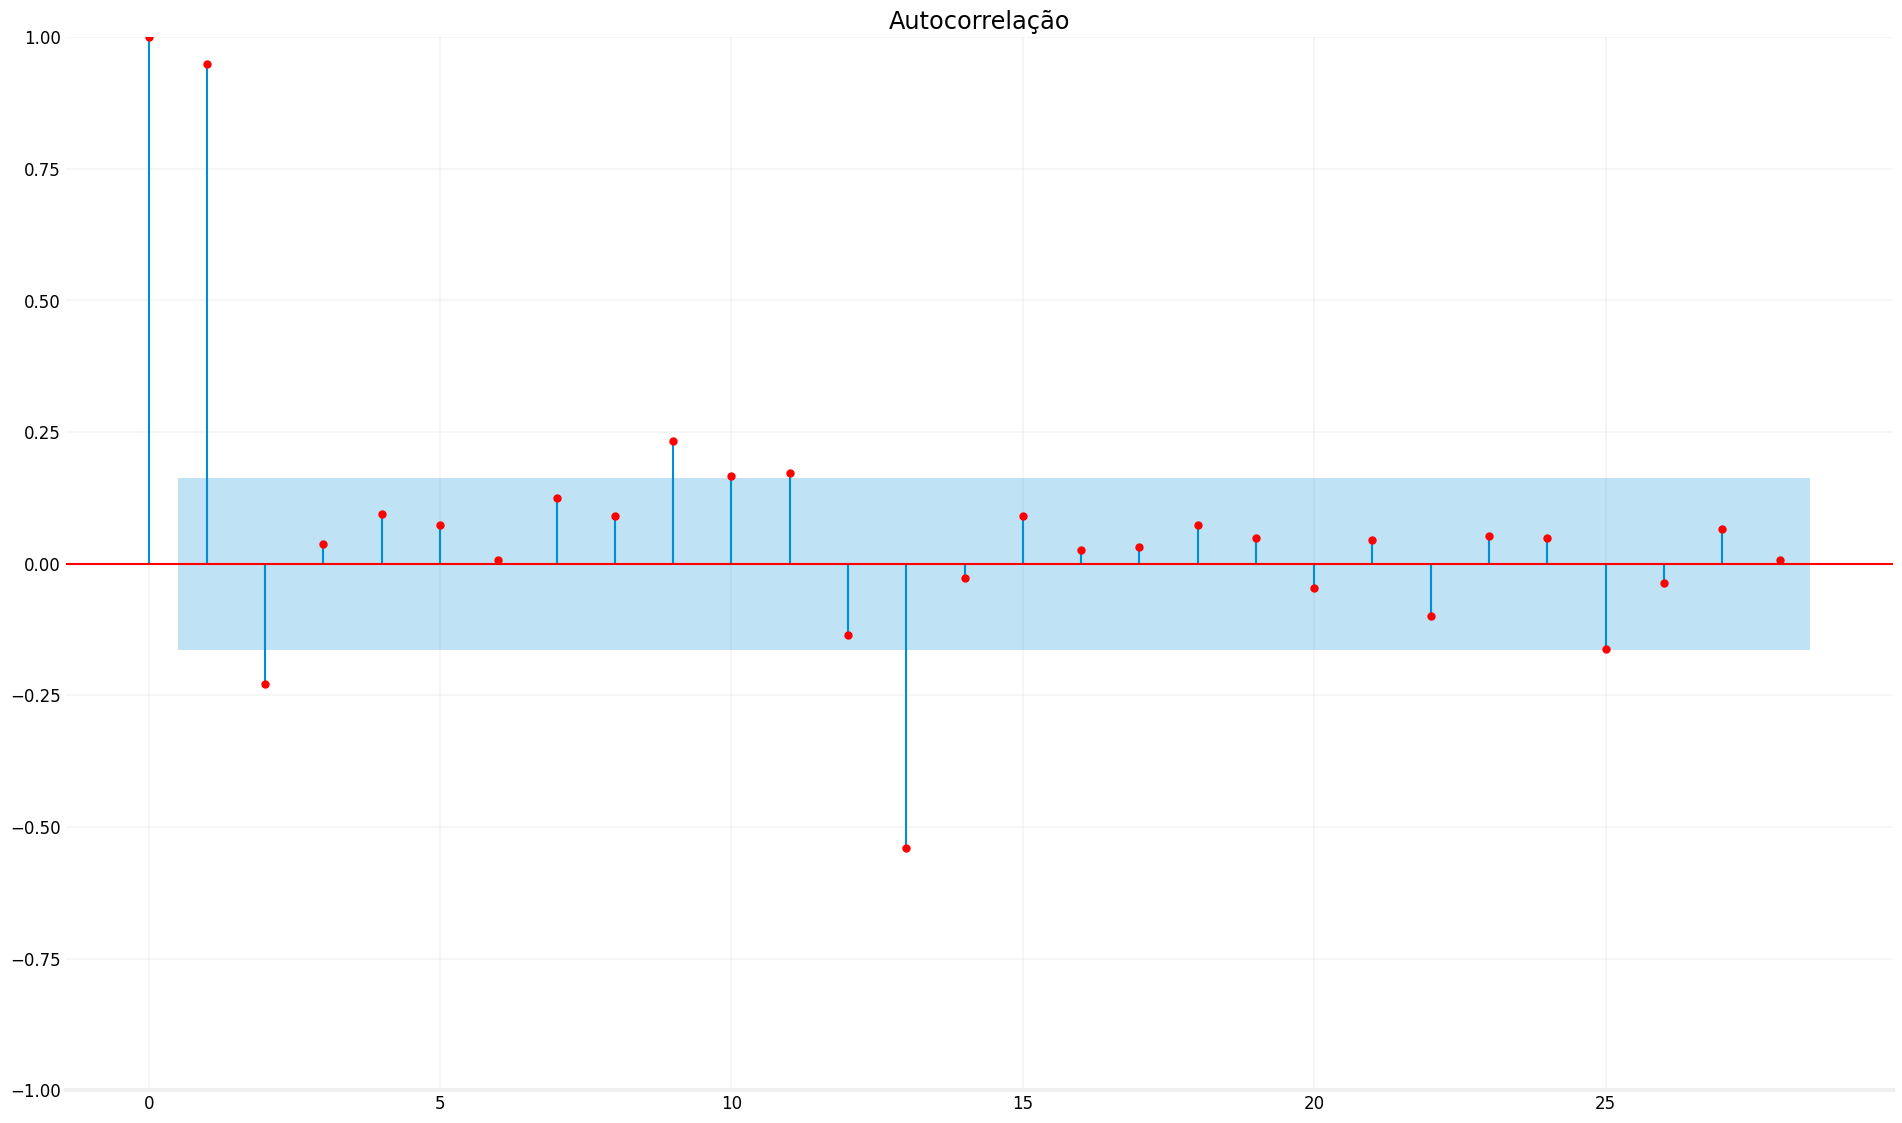

In [ ]:
# Função de correlação parcial para série temporal

plot_pacf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=28, title = "Autocorrelação", color="red");

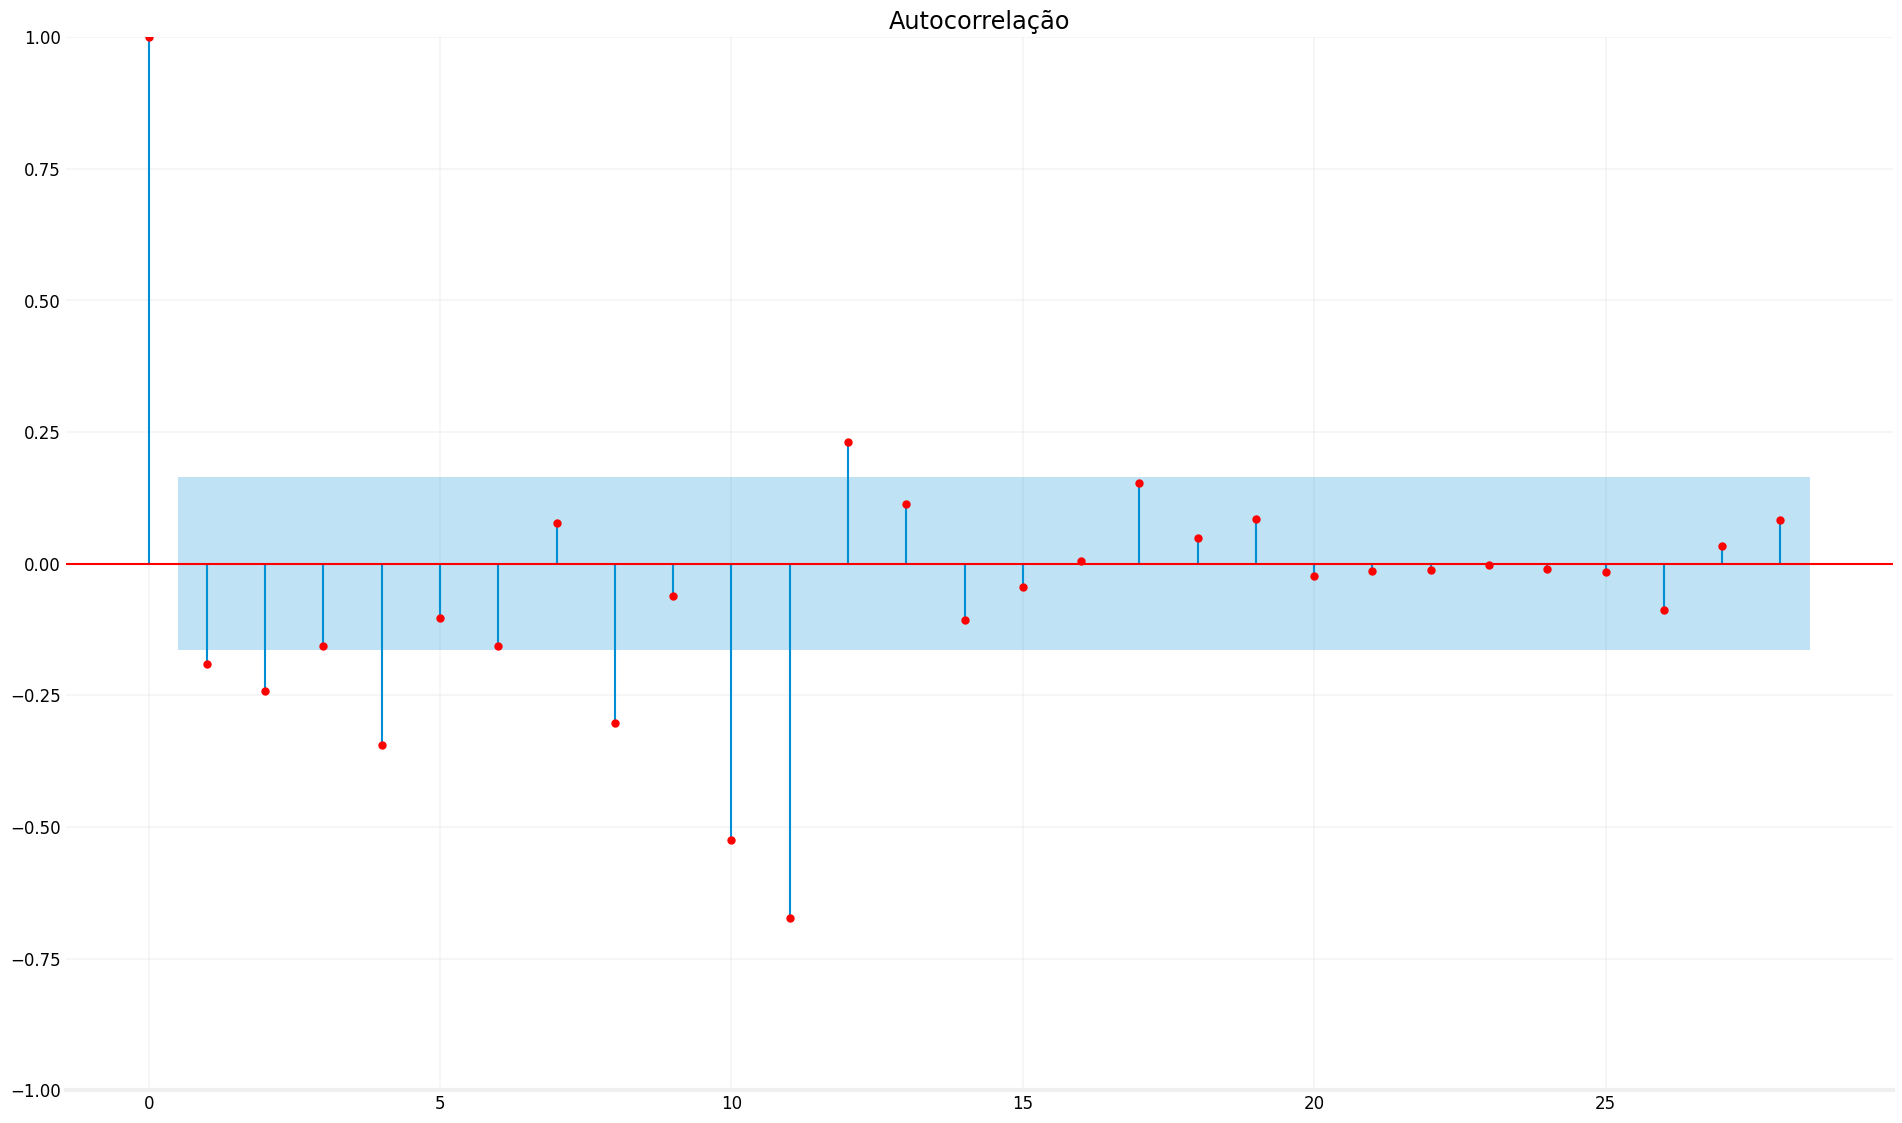

In [ ]:
# Função de correlação parcial para série das diferenças finitas da ordem escolhida acima

plot_pacf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=28, title = "Autocorrelação", color="red");

#### Separação das bases de treino e teste

In [ ]:
# Definição da proporção de dados para compor a base de teste

PercentualTeste = 10

In [ ]:
# Cálculo do tamanho do período de testes
PeriodoTeste = PercentualTeste * len(MinhaSerieTemporal) // 100

# Definição do DataFrame de treino
TreinoDF = pd.DataFrame(index = MinhaSerieTemporal[:-PeriodoTeste].index)
TreinoDF['Treino'] = MinhaSerieTemporal[:-PeriodoTeste][MinhaSerieTemporal.columns[0]]

# Definição do DataFrame de teste
TesteDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
TesteDF['Teste'] = MinhaSerieTemporal[-PeriodoTeste:][MinhaSerieTemporal.columns[0]]

<Axes: xlabel='Mês'>

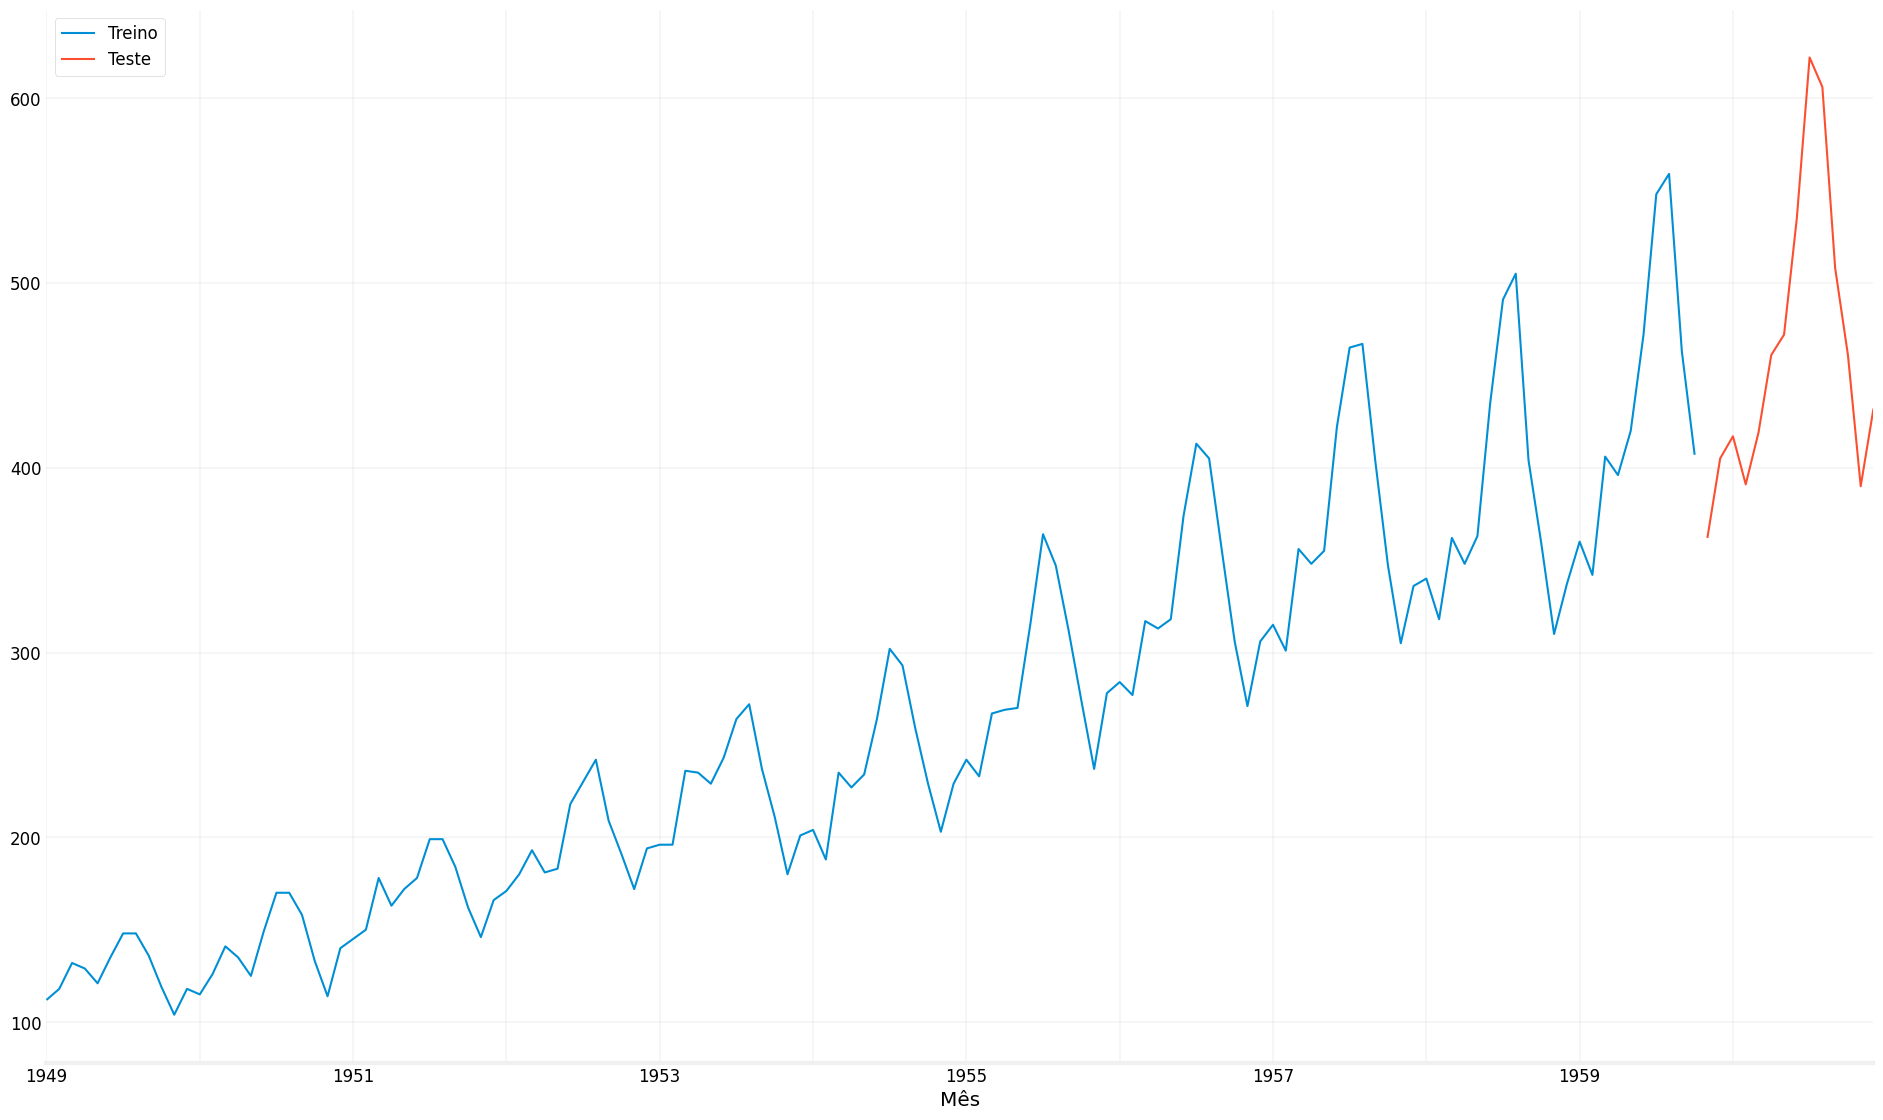

In [ ]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([TreinoDF,TesteDF], axis = 1).plot()

#### Previsão pelo modelo ARIMA

In [ ]:
pRange = 4
dRange = 3
qRange = 4

Modelos = []
for d in range(dRange):
    for p in range(pRange):
        for q in range (qRange):
            Modelos.append(f'ARIMA({p:2},{d:2},{q:2})')

AIC = []
for d in range(dRange):
    for p in range(pRange):
        for q in range (qRange):
            model = SARIMAX(TreinoDF, order=(p,d,q))
            model_fit = model.fit()
            AIC.append(model_fit.aic)

C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible startin

In [ ]:
ModelosAIC = pd.DataFrame(index = Modelos)
ModelosAIC.index.rename('Modelo', inplace = True)
ModelosAIC['AIC'] = AIC
ModelosAIC

,AIC
Modelo,
"ARIMA( 0, 0, 0)",1837.205486
"ARIMA( 0, 0, 1)",1667.149533
"ARIMA( 0, 0, 2)",1599.818664
"ARIMA( 0, 0, 3)",1448.699107
"ARIMA( 1, 0, 0)",1270.686711
"ARIMA( 1, 0, 1)",1256.131235
"ARIMA( 1, 0, 2)",1254.375926
"ARIMA( 1, 0, 3)",1254.987742
"ARIMA( 2, 0, 0)",1260.379316


In [ ]:
AICmin = ModelosAIC.min().values[0]

In [ ]:
ModelosAIC[ModelosAIC['AIC'].values <= AICmin]

,AIC
Modelo,
"ARIMA( 3, 1, 3)",1194.052918


In [ ]:
# Definição da ordem de autorregressividade
p = 3

# Definição da ordem de integração
d = 1

# Definição da ordem da média móvel
q = 3

In [ ]:
model = SARIMAX(TreinoDF, order=(p,d,q))
model_fit = model.fit()

C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\leopo\.conda\envs\PUCminas\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Treino   No. Observations:                  130
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -590.026
Date:                Mon, 24 Feb 2025   AIC                           1194.053
Time:                        16:56:57   BIC                           1214.072
Sample:                    01-01-1949   HQIC                          1202.187
                         - 10-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9203      0.090     10.235      0.000       0.744       1.097
ar.L2          0.3201      0.135      2.366      0.018       0.055       0.585
ar.L3         -0.7049      0.091     -7.738      0.000      -0.883      -0.526
ma.L1         -0.8307      1.187     -0.700      0.484      -3.157       1.495
ma.L2         -0.8657      2.152     -0.402      0.687      -5.083       3.352
ma.L3          0.9641      1.120      0.860      0.390      -1.232       3.160
sigma2       517.4045    594.597      0.870      0.384    -647.984    1682.793
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 1.90
Prob(Q):                              0.49   Prob(JB):                         0.39
Heteroskedasticity (H):               6.14   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
PrevisoesSARIMAX = model_fit.get_prediction(len(TreinoDF), len(TreinoDF) + len(TesteDF) - 1).predicted_mean

In [ ]:
# Montagem do DataFrame de previsão

PrevisoesDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
PrevisoesDF['Previsão'] = PrevisoesSARIMAX

<Axes: xlabel='Mês'>

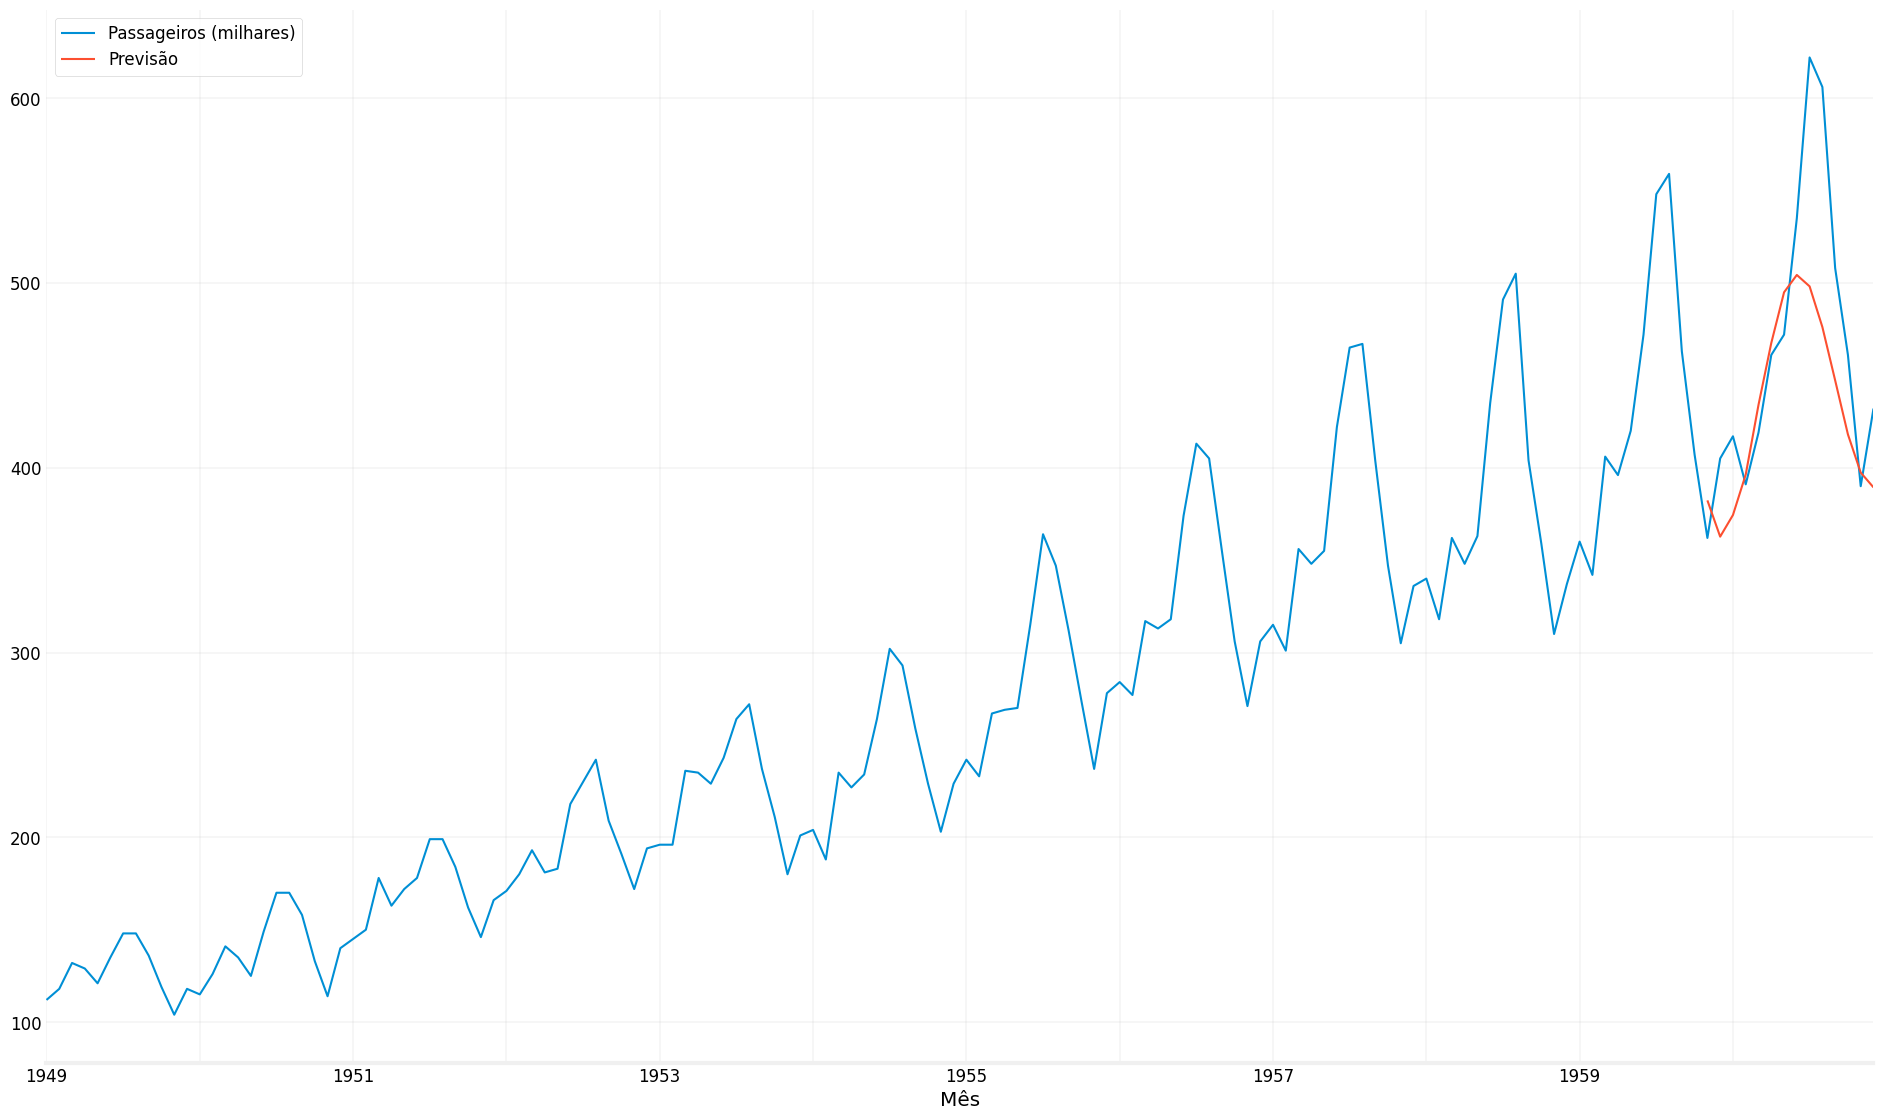

In [ ]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([MinhaSerieTemporal,PrevisoesDF], axis = 1).plot()

#### Medidas de erro

In [ ]:
# Cáluclo do vetor de erros

Erros = PrevisoesDF['Previsão'].values - TesteDF['Teste'].values
Erros

array([  20.31784356,  -42.30776253,  -42.60429849,    5.28182833,
         15.00229384,    6.47131221,   22.91868956,  -30.69723811,
       -123.86703198, -129.88783225,  -60.74220624,  -42.99556963,
          7.36934828,  -42.64557266])

In [ ]:
# Cálculo do erro médio
ErroMedio = Erros.mean()

In [ ]:
# Cálculo do erro absoluto médio
MAE = np.abs(Erros).mean()

In [ ]:
# Cálculo da raiz do erro quadrático médio
RMSE = np.sqrt((Erros**2).mean())

In [ ]:
# Cálculo dos erros relativos
ErrosRelativos = Erros / TesteDF['Teste'].values
ErrosRelativos

array([ 0.05612664, -0.10446361, -0.10216858,  0.01350851,  0.035805  ,
        0.01403755,  0.04855655, -0.05737802, -0.19914314, -0.21433636,
       -0.11957127, -0.09326588,  0.01889576, -0.0987166 ])

In [ ]:
# Cálculo do erro percentual absoluto médio
MAPE = np.abs(ErrosRelativos).mean()

In [ ]:
print(f'Medidas de erro de previsão')
print()
print(f'Modelo de previsão: ARIMA({p},{d},{q})')
print()
print(f'Erro médio: {ErroMedio: 2.1f}')
print(f'MAE:        {MAE: 2.1f}')
print(f'RMSE:       {RMSE: 2.1f}')
print(f'MAPE:       {MAPE*100: 2.1f} %')

Medidas de erro de previsão

Modelo de previsão: ARIMA(3,1,3)

Erro médio: -31.3
MAE:         42.4
RMSE:        56.9
MAPE:        8.4 %
